# Setup

In [1]:
# Common ml library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Load the California House Pricing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
## Let's check the description of the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
#dataset['Price']=housing.target

In [7]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Preparing The Dataset

In [10]:
# Dataframe 
dataset = pd.DataFrame(housing.data,columns = housing.feature_names)

In [11]:
dataset['Price']=housing.target

In [12]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Exploratory Data Analysis
Correlation analysis in machine learning's exploratory data analysis helps uncover relationships between variables, aiding in feature selection and model performance improvement.

In [13]:
# Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [14]:
# check for missing values
dataset.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [15]:
# check for missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Visualize dataset in a scatter diagram

In [ ]:
# Seaborn is a Python library that enhances matplotlib's capabilities, 
# providing an intuitive interface for creating visually appealing statistical 
# plots and graphics.

import seaborn as sns
sns.pairplot(dataset)

In [18]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


# Analyzing The Correlated Features

Text(0, 0.5, 'Price')

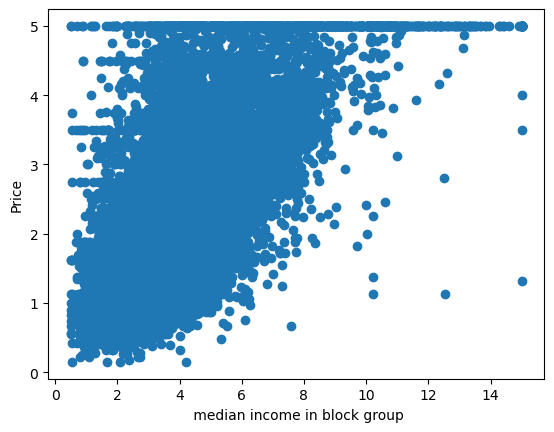

In [19]:
# find the correlation between the price to that of the avg salary
# note from the diagram that, as avg salary increases, the price of the 
# houses aslo increase
plt.scatter(dataset['MedInc'], dataset['Price'])
plt.xlabel(' median income in block group')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

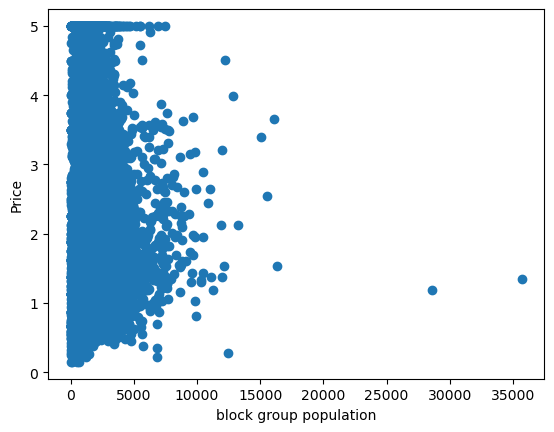

In [20]:
plt.scatter(dataset['Population'], dataset['Price'])
plt.xlabel('block group population')
plt.ylabel('Price')

Text(0, 0.5, 'block group population')

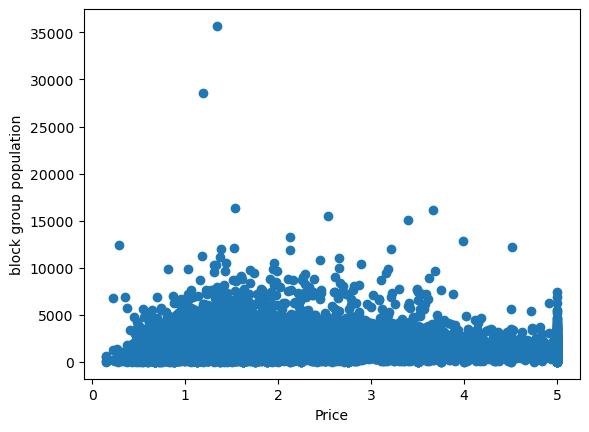

In [21]:
plt.scatter(dataset['Price'], dataset['Population'])
plt.xlabel('Price')
plt.ylabel('block group population')

<Axes: xlabel='MedInc', ylabel='Price'>

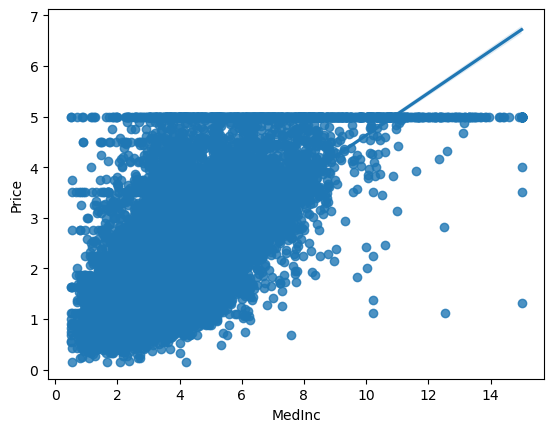

In [22]:
sns.regplot(x="MedInc", y="Price", data=dataset) # positively correlated

<Axes: xlabel='Population', ylabel='Price'>

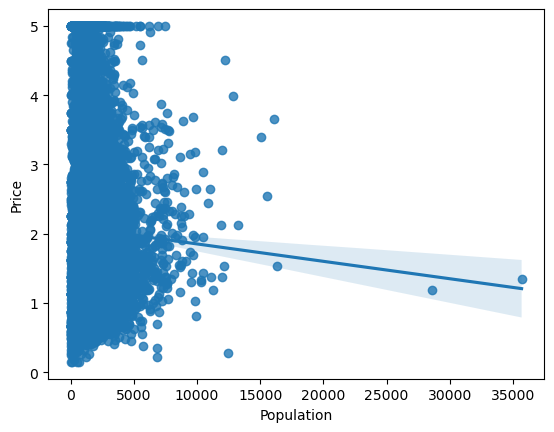

In [23]:
sns.regplot(x="Population", y="Price", data=dataset) # negatively correlated

<Axes: xlabel='AveRooms', ylabel='Price'>

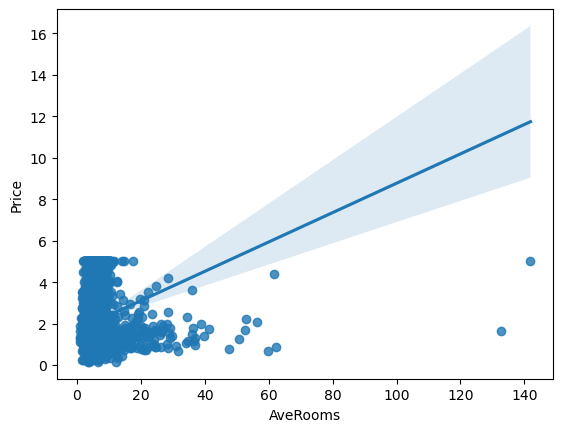

In [24]:
sns.regplot(x="AveRooms", y="Price", data=dataset) # positively correlated


In [25]:
# Divide our variables into independent and dependent variables
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [26]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

## Spliting the Data into Training/Test sets

In [28]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [30]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


# Standardize the Dataset
Standardizing datasets in machine learning ensures features are on a similar scale, aiding algorithms sensitive to varying magnitudes and enhancing convergence.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.fit_transform(X_test)

In [34]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [35]:
X_test

array([[-1.15209909, -0.30267793, -0.48206459, ...,  0.60588341,
         0.22100564,  0.26245997],
       [-0.70179147,  0.09672999, -0.14607585, ..., -0.1827281 ,
        -0.20974655,  0.0379687 ],
       [-0.19920134,  1.85412486, -0.56735074, ..., -1.051554  ,
         1.03568912, -1.44866235],
       ...,
       [-0.18230355, -1.02161219, -0.65256612, ..., -0.3870047 ,
        -0.89801363,  0.8112164 ],
       [-0.10920338, -1.5009017 ,  0.03743213, ...,  0.38864246,
         1.0450533 , -0.86997375],
       [-0.42597077, -0.94173061, -0.81378442, ..., -0.22539751,
        -0.67327336,  0.64658947]])

# Model Training

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regression = LinearRegression()

In [38]:
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Print the coefficients
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [40]:
# Print the intercept
print(regression.intercept_)

2.0692396089424165


In [41]:
# on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Prediction With Test Data

In [42]:
reg_pred=regression.predict(X_test)

In [43]:
reg_pred

array([0.70074765, 1.75651603, 2.73363614, ..., 2.08473667, 1.56199123,
       1.83521508])

# Assumptions

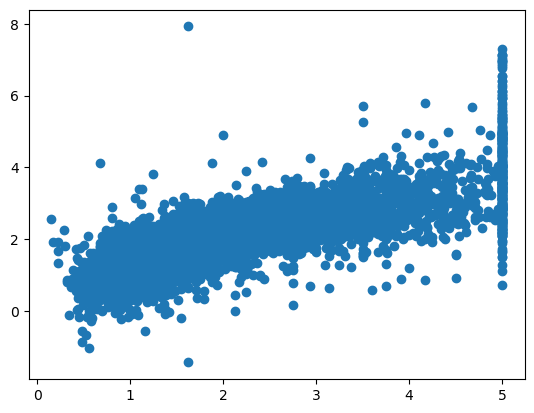

In [44]:
## Plot a scatter plot for the prediction
plt.scatter(y_test, reg_pred)

In [45]:
## Residuals - the errors between the y_test and the reg_pred
residuals = y_test-reg_pred

C:\Users\Klenam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


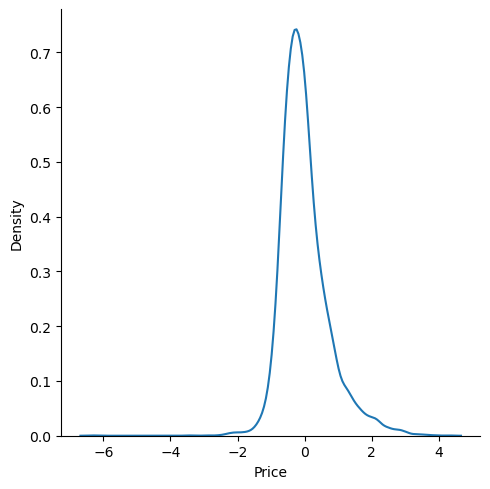

In [46]:
## Plot this residuals

sns.displot(residuals, kind="kde")

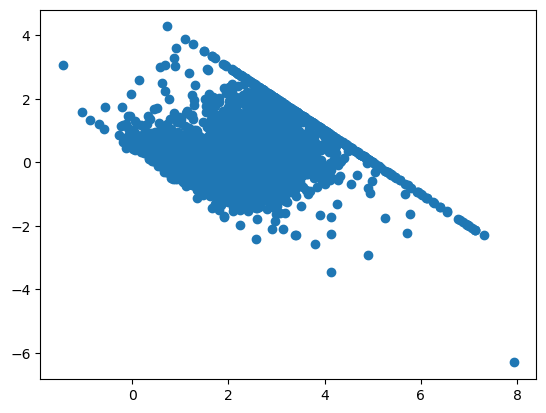

In [47]:
## Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(reg_pred, residuals)


In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

0.5238759626552133
0.5165967398485733
0.7187466451042213


# R square and adjusted R square
Formula:

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares


In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.606414511241866


**Adjusted R2 = 1-[(1-R2)*(n-1)(n-k-1)]**

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables


In [51]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6059052626715822

## New Data Prediction

In [53]:
housing.data[0].reshape(1, -1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [55]:
# transformation of new data
scaler.transform(housing.data[0].reshape(1,-1))

C:\Users\Klenam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.36730311,  0.97542743,  0.62520012, -0.13139628, -0.98531614,
        -0.26453569,  1.07314583, -1.34389976]])

In [54]:
regression.predict(housing.data[0].reshape(1,-1))

array([84.33102212])

## Pickling The Model File For Deployment

In [56]:
import pickle

In [57]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [58]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [60]:
## Prediction
pickle_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

C:\Users\Klenam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.18565815])